In [51]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [52]:
import pandas as pd
import numpy as np
dataFile = '/kaggle/input/heart-disease-prediction/public_datasets/Heart_disease_cleveland_new.csv'
df = pd.read_csv(dataFile)

In [53]:
CTGANSynthesizer_datafile = '/kaggle/input/heart-disease-prediction/synthetic_datasets/CTGANSynthesizer_dataset.csv'

In [54]:
df_CTGANSynthesizer = pd.read_csv(CTGANSynthesizer_datafile)

In [55]:
X=df.iloc[:,0:13]
X_CTGANSynthesizer = df_CTGANSynthesizer.iloc[:,0:13]
X_CTGANSynthesizer

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53,0,0,155,161,0,0,86,0,2.3,0,3,1
1,67,1,3,106,255,1,2,168,0,0.0,1,0,1
2,72,1,2,126,190,0,0,140,1,1.0,0,0,3
3,60,1,3,134,230,0,0,202,1,0.0,1,0,3
4,77,1,1,151,126,1,2,167,0,0.9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,51,0,1,192,221,0,2,88,0,2.5,1,1,3
996,40,1,0,160,159,0,0,173,0,0.0,2,0,1
997,58,0,3,164,126,0,0,118,0,0.0,1,0,1
998,58,1,2,152,183,0,2,159,0,0.1,1,2,1


In [56]:
y=df['target']
y_CTGANSynthesizer = df_CTGANSynthesizer['target']
y_CTGANSynthesizer.value_counts()

target
0    164
1    139
Name: count, dtype: int64

In [57]:
df.skew(axis = 0)

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.208791
thal        0.342673
target      0.166406
dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.concat([X_train, X_CTGANSynthesizer], ignore_index=True)
y_train = pd.concat([y_train, y_CTGANSynthesizer], ignore_index=True)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,29,1,1,130,204,0,2,202,0,0.0,0,0,1
1,57,1,2,150,126,1,0,173,0,0.2,0,1,3
2,69,1,0,160,234,1,2,131,0,0.1,1,1,1
3,65,0,2,160,360,0,2,151,0,0.8,0,0,1
4,52,1,3,108,233,1,0,147,0,0.1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,51,0,1,192,221,0,2,88,0,2.5,1,1,3
1238,40,1,0,160,159,0,0,173,0,0.0,2,0,1
1239,58,0,3,164,126,0,0,118,0,0.0,1,0,1
1240,58,1,2,152,183,0,2,159,0,0.1,1,2,1


# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=10000)
logModel.fit(X_train, y_train)
y_pred = logModel.predict(X_test)

Confusion Matrix:


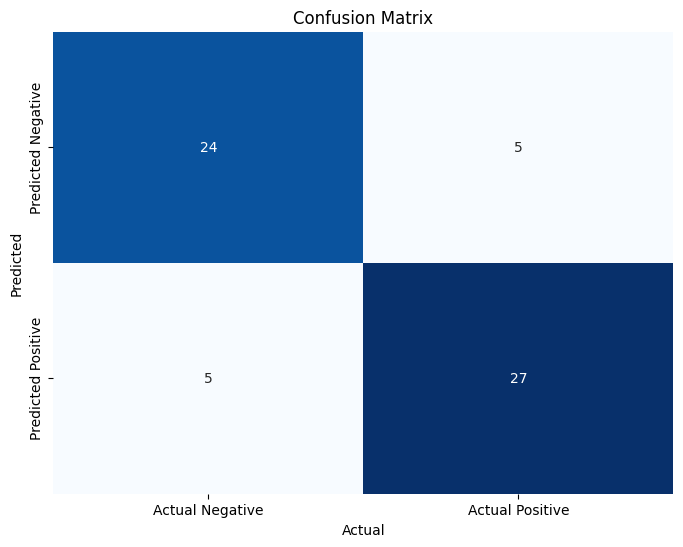

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# SVM Classifier

In [61]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# from sklearn.metrics import confusion_matrix
# cm_test = confusion_matrix(y_pred, y_test)

# y_pred_train = classifier.predict(X_train)
# cm_train = confusion_matrix(y_pred_train, y_train)

# print()
# print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Confusion Matrix:


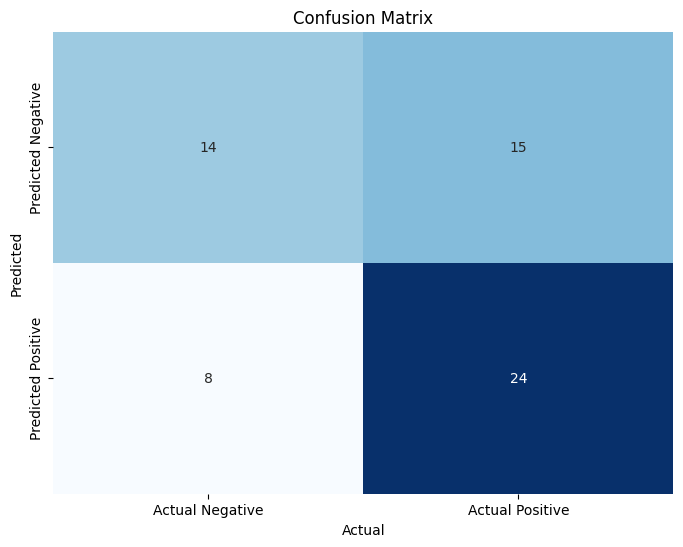

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.48      0.55        29
           1       0.62      0.75      0.68        32

    accuracy                           0.62        61
   macro avg       0.63      0.62      0.61        61
weighted avg       0.63      0.62      0.62        61



In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Random Forest Classification

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix:


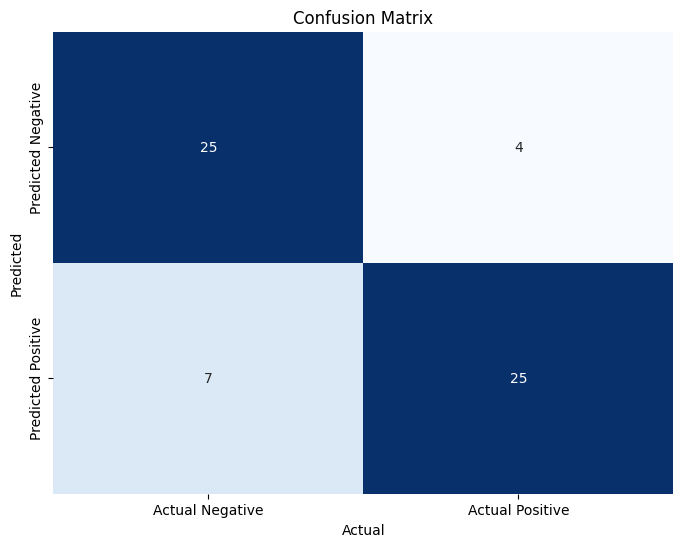

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Naive Bayes Classification

In [65]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)


Confusion Matrix:


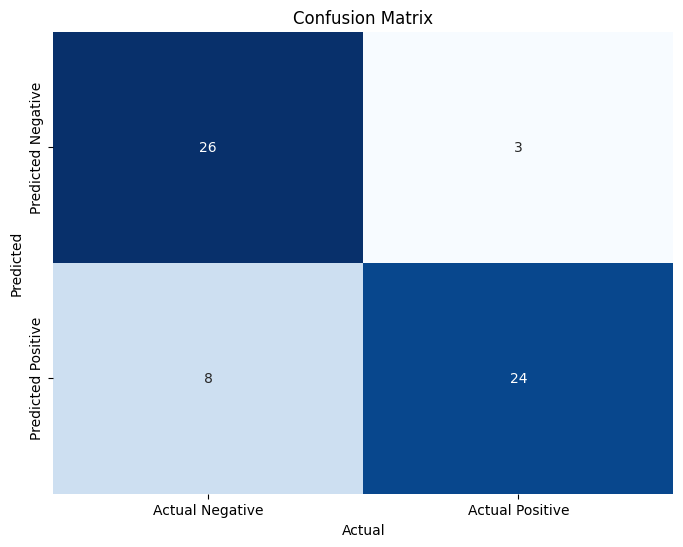

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix:


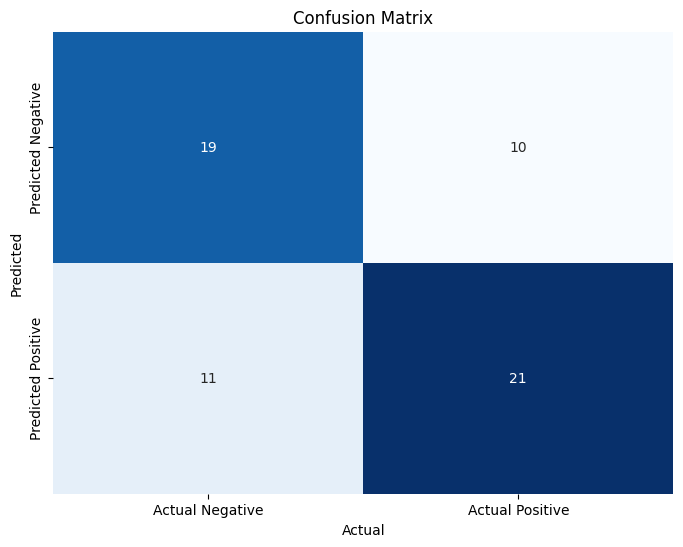

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        29
           1       0.68      0.66      0.67        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Light GBM

In [69]:
import warnings

# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [70]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 1242, number of used features: 13
[LightGBM] [Info] Start training from score 0.525765


Confusion Matrix:


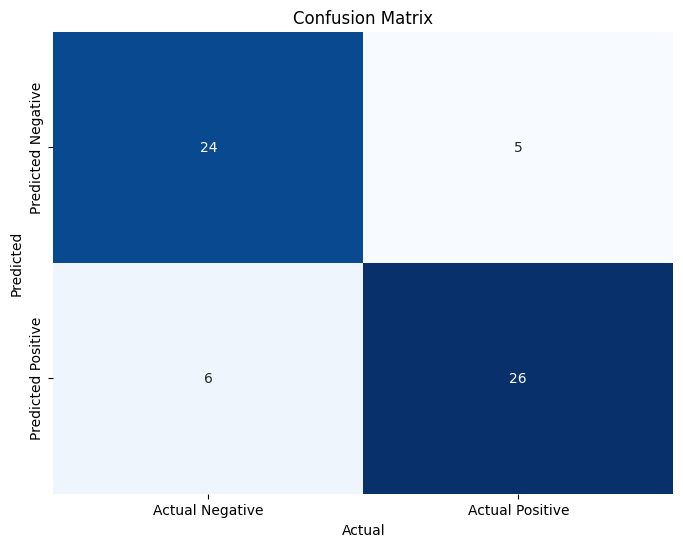

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# XGboost Classification

In [72]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

Confusion Matrix:


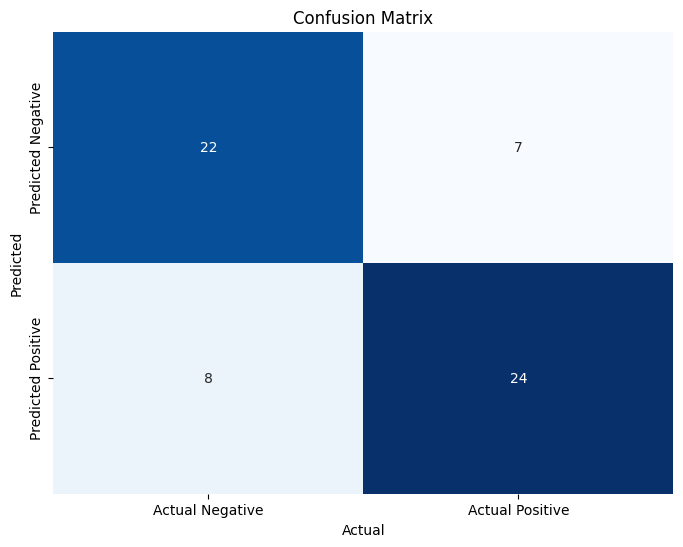

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Neural Network Classifier

In [74]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                      alpha=0.0001, batch_size='auto', learning_rate='constant', 
                      learning_rate_init=0.001, max_iter=200, shuffle=True, 
                      random_state=None, tol=0.0001, verbose=False, 
                      warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                      early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
                      beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                      max_fun=15000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Confusion Matrix:


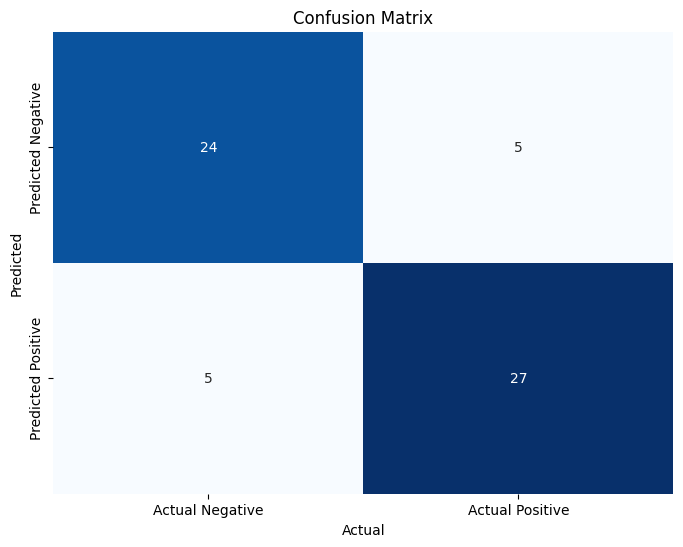

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [75]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)